In [1]:
from pybedtools import BedTool
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
bam_dir = '../bam'

## Characteristics of the capture design

In [5]:
target_regions = BedTool('../input/target_regions.bed')

### Total length of target regions

In [6]:
target_regions.total_coverage()

573657

### Size distribution of target regions (all numbers in bp)

In [7]:
lengths = pd.Series(i.length for i in target_regions)

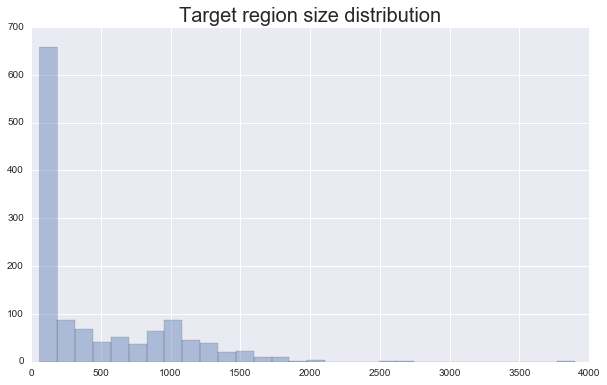

In [8]:
sns.distplot(lengths, kde=False)
plt.title('Target region size distribution', fontsize=20)

In [9]:
def analyze_coverage(bam_file, target_regions):
    bam = BedTool(bam_file)
    cov = target_regions.coverage(bam, d=True).to_dataframe()
    
    print(bam_file, '\n========================================')
    print('Number of bases in target regions covered:', len(cov.query('score > 0')))
    print('Fraction of target regions covered:', (cov.score > 0).mean() * 100, '%')
    print('\nSummary of coverage at sites in target regions:\n')
    print(cov.score.describe())
    
    sns.distplot(cov.score, kde=False)
    plt.title('Coverage distribution', fontsize=20)
    plt.tick_params(labelsize=15)
    plt.xlabel('coverage', fontsize=20)
    plt.xlim(0, cov.score.max())

# El Sidron 570kb capture

../bam/sidron_ontarget.bam 
Number of bases in target regions covered: 549351
Fraction of target regions covered: 95.7629733447 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          8.425742
std           5.475308
min           0.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          53.000000
Name: score, dtype: float64


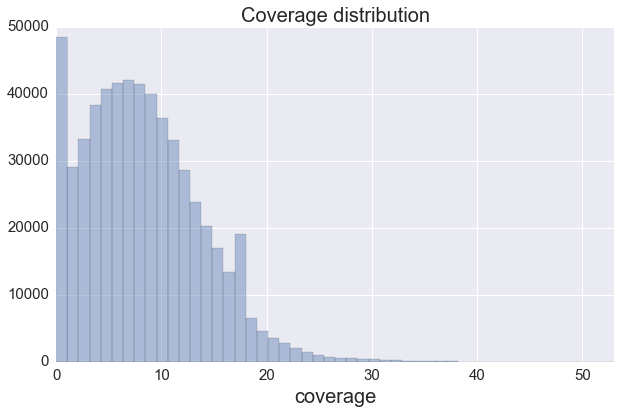

In [10]:
analyze_coverage('../bam/sidron_ontarget.bam', target_regions)

# Denisova 8 shotgun (all fragments)

../bam/den8_ontarget.bam 
Number of bases in target regions covered: 22376
Fraction of target regions covered: 3.9005886793 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          0.041147
std           0.209512
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: score, dtype: float64


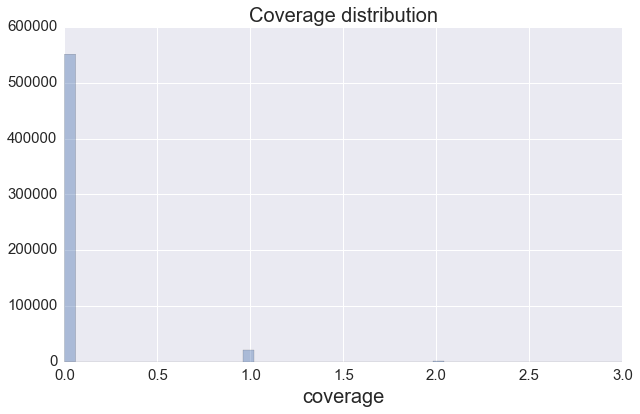

In [11]:
analyze_coverage('../bam/den8_ontarget.bam', target_regions)

# Denisova 8 shotgun (damaged fragments only)

../bam/deam_den8_ontarget.bam 
Number of bases in target regions covered: 4227
Fraction of target regions covered: 0.736851463505 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          0.007369
std           0.085523
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: score, dtype: float64


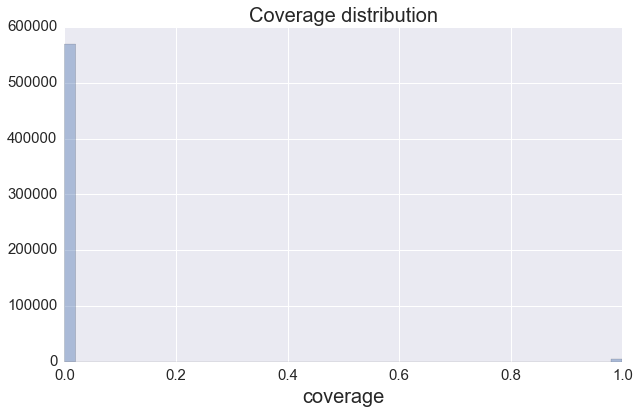

In [12]:
analyze_coverage('../bam/deam_den8_ontarget.bam', target_regions)

# El Sidron exome capture

../bam/exome_sidron_ontarget.bam 
Number of bases in target regions covered: 20746
Fraction of target regions covered: 3.61644676174 %

Summary of coverage at sites in target regions:

count    573657.000000
mean          0.215787
std           2.287567
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         158.000000
Name: score, dtype: float64


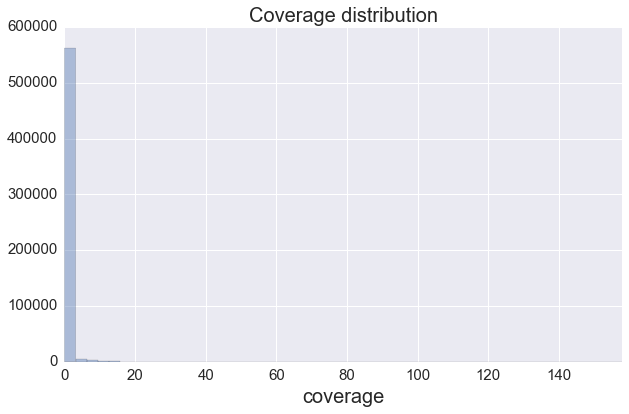

In [13]:
analyze_coverage('../bam/exome_sidron_ontarget.bam', target_regions)

# A00 Y chromosome data

../bam/a00_ontarget.bam 
Number of bases in target regions covered: 573656
Fraction of target regions covered: 99.9998256798 %

Summary of coverage at sites in target regions:

count    573657.000000
mean         21.815273
std           6.579486
min           0.000000
25%          17.000000
50%          21.000000
75%          26.000000
max         154.000000
Name: score, dtype: float64


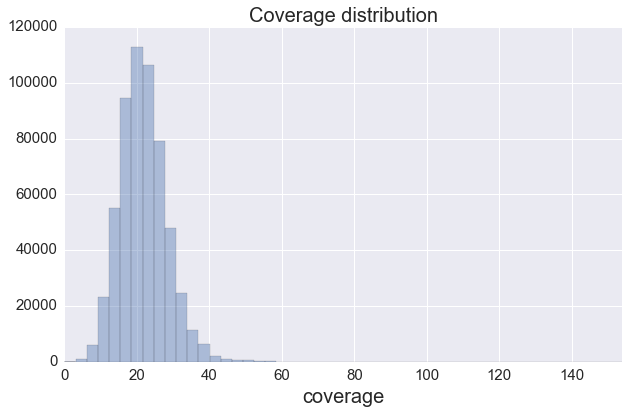

In [14]:
analyze_coverage('../bam/a00_ontarget.bam', target_regions)